In [58]:
def plot_graph(df):
    sns.set_style('darkgrid')

    plt.figure(figsize=(20,5))
    sns.lineplot(x='Time',y='Sentiment score',data=df)
    plt.title('Iron Man')
    plt.xlabel('Time')
    plt.ylabel('Sentiment score')
    plt.xticks([])
    return plt.show()

def create_data_frame(plot_data):
    x = [data[0] for data in plot_data]
    y = [data[2] for data in plot_data]

    df = pd.DataFrame({'Time':x, 'Sentiment score':y})
    df['Time'] = pd.to_datetime(df['Time'])
    df.to_excel('Iron_Man.xlsx',index=False)
    return plot_graph(df)

def get_senti_score(plot_data):
    sia = SIA()
    for l in plot_data:
        scores = sia.polarity_scores(l[1])
        l.append(scores['compound'])
    return create_data_frame(plot_data)

In [59]:
def get_plot_data(main_list):
    plot_data = []
    subtitle = ''
    i = 0

    delta = datetime.timedelta(seconds=10)
    start = datetime.datetime.strptime('00:00:00',"%H:%M:%S")
    end = datetime.datetime.strptime(main_list[-1][2],"%H:%M:%S") + delta

    prev_time = start
    curr_time = start

    while curr_time <= end:          
            if i == len(main_list):
                subtitle = main_list[i-1][0]
                plot_data.append([curr_time.time().strftime("%H:%M:%S"),subtitle]) 
                break
            else:
                lst_time = datetime.datetime.strptime(main_list[i][2], "%H:%M:%S")      
                if prev_time <= lst_time <= curr_time:
                    subtitle += main_list[i][0]
                    i += 1
                else:
                    plot_data.append([curr_time.time().strftime("%H:%M:%S"),subtitle])
                    subtitle = ''
                    prev_time = curr_time
                    curr_time += delta     
    return get_senti_score(plot_data)

In [60]:
def format_data(data):    
    main_list = []
    start = 0
    # Create main_list as nested list having a string of timeframe and its corresponding subtitles
    for i in range(len(data)):
        if data[i] == '':      
            main_list.append(data[start:i])
            start = i+1
    main_list.pop(-1)
    
    # Formatting the each list inside main_list to get start time, end time and subtitle track
    for lst in main_list: 
        lst.extend(lst[0].split(' --> '))
        lst.pop(0)
        if len(lst) == 4:
            lst[0] = lst[0]+lst[1]
            lst.pop(1)

        lst[1] = lst[1][:-4]
        lst[2] = lst[2][:-4]
        
    return get_plot_data(main_list)

def read_data():
    datafile = open('Iron Man.srt')
    data = datafile.read().split('\n')
    data = [elem for elem in data if elem.isnumeric() == False]
    return format_data(data)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nivey\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


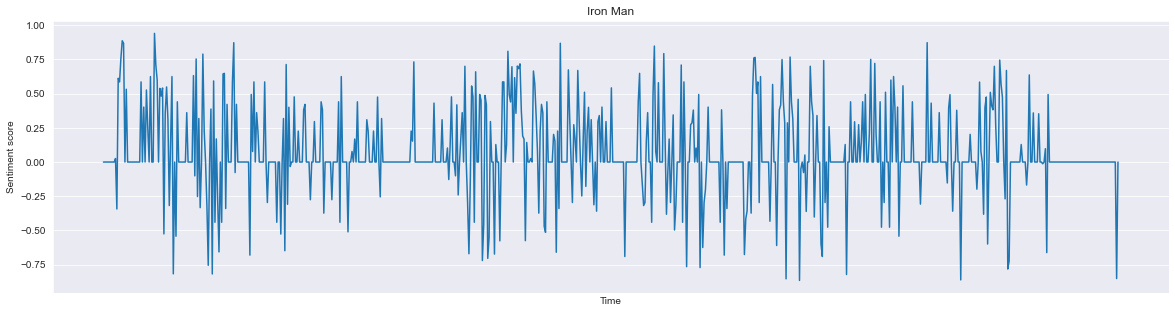

In [61]:
# Imports
import datetime
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Driver
read_data()


